# Data visualisation
## by Prakash Srinivsan, Ryan van der Werf and Jim van Veenhuyzen (group 70)
\
In this notebook we aim to visualise our data obtained from the matrix factorization algorithms in the other notebook. More specifically, we use the feature matrices for both the users and movies. The user and movie matrices are $U$ and $V$ & $U$ and $M$ for the $\textbf{UV decomposition}$ and the $\textbf{Matrix Factorization}$ respectively. 

In [188]:
#Import general python libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import random
#Import sklearn related functions, most importantly PCA and TSNE
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#Import UMAP 
import umap
import umap.plot

In [2]:
#First read in the MovieLens 1M data

usersData = pd.read_csv('users.dat', sep='::', header=None, \
                        names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], engine='python')
ratingsData = pd.read_csv('ratings.dat', sep='::', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'], engine='python')
moviesData = pd.read_csv('movies.dat', sep='::', header=None, \
                         names=['MovieID', 'Title', 'Genres'], engine='python', encoding='latin1')

Lets first inspect how the user and movie data looks so we can identify which features belong to the users and movies.

In [119]:
usersData.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


We can see that the relevant features for the users are the user's $\textit{gender}$, $\textit{age}$ and $\textit{occupation}$. 

In [4]:
moviesData.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


We can see that the relevant features for the movies are the movie's $\textit{title}$ and $\textit{genres}$, but from the $\textit{title}$ the year of release is the most interesting to look at, and the $\textit{genre}$ features encompasses various genres. Next, we load in the feature matrices generated from the UV decomposition and Matrix Factorization algorithms. 

In [168]:
U1 = np.load('predicted_U_1.npy')
V1 = np.load('V_fold1.npy')
users1 = np.load('userID_fold1.npy') 
movies1 = np.load('movieID_fold1.npy')

"""
Lets view the header of one of the feature matrices we generated, for example the U-matrix generated by 
the Matrix Decomposition algorithm using num_factors=10. This means there are 10 user-features for each user.
"""
user_features = np.arange(1,11,1) #num_factors=10 was used, so there are 10 user-features
df_U1 = pd.DataFrame(data=U1,index=users1, columns=user_features)
df_U1.head()

,1,2,3,4,5,6,7,8,9,10
1,0.860823,0.190604,0.268035,0.863651,0.632721,0.535228,0.208387,0.725279,0.646824,0.905409
2,0.233199,0.442093,0.271232,0.844727,0.882524,-0.100023,0.714339,0.921956,-0.002386,0.898872
3,1.061206,0.912620,1.189597,0.871939,0.345037,-0.297734,0.507672,0.840903,-0.154345,0.412239
4,1.311179,0.589009,0.383098,0.140379,0.262039,0.787067,0.357429,0.969267,0.575986,0.769088
5,0.017798,0.368527,0.424269,0.093695,0.729064,1.347575,0.553867,0.083483,0.639838,-0.148672


Now that we've imported the data, lets first apply $\textbf{PCA}$ to reduce the dimensionality to 2. First, we analyse the user matrix $U$ from the $\textbf{Matrix Factorization}$. For the user data, the main areas of interest are the $\textit{gender}$, $\textit{age}$ and $\textit{occupation}$ of the user. The following code inspects whether there is any clustering for the $\textit{genders}$ and $\textit{ages}$ of the users. 

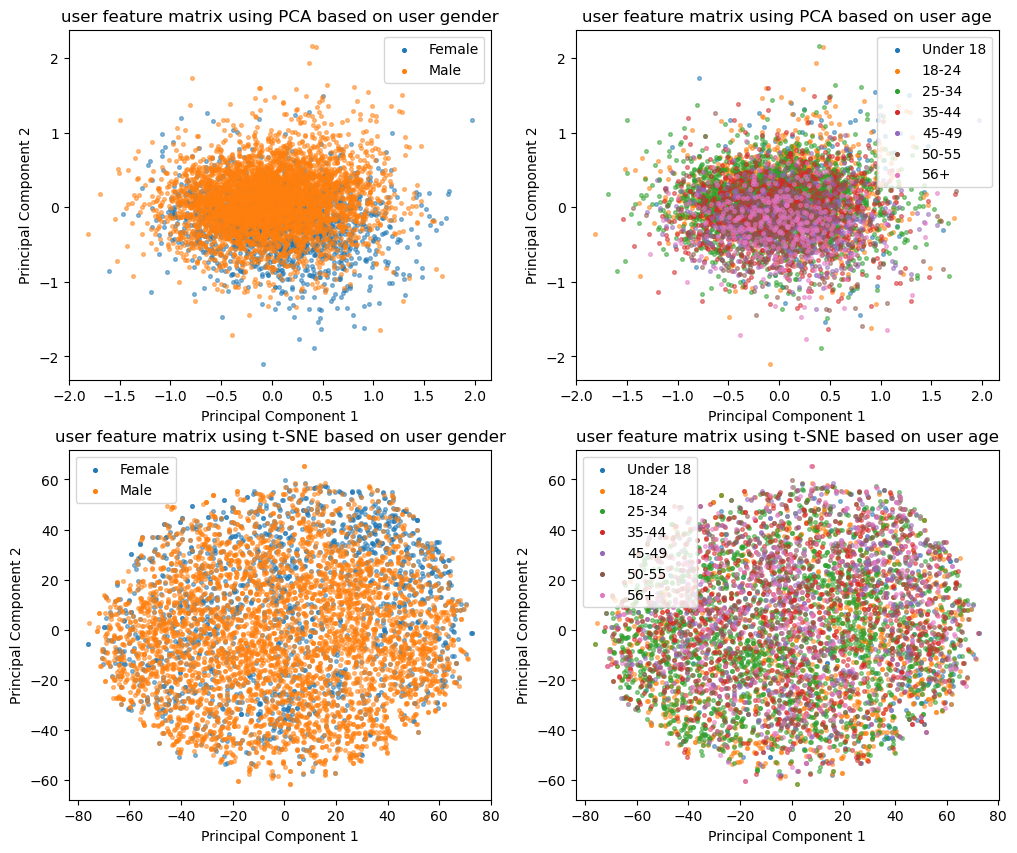

In [157]:
#Obtain the user data in the Gender and Age columns
U1_user = usersData[usersData['UserID'].isin(users1)]

#Define the ages and corresponding labels
U1_age = U1_user['Age']
labels_age = ["Under 18","18-24","25-34","35-44","45-49","50-55","56+"]

#Define the genders and corresponding labels
U1_gender = U1_user['Gender']
labels_gender = ['Female','Male']

#Apply the PCA on the U-matrix, reducing the number of user-features and thus the amount of columns to 2
pca = PCA(n_components=2)
pca_data = pca.fit_transform(U1)

#Apply t-SNE on the U-matrix

M1_tsne = TSNE(n_components=2)
M1_tsne_30 = M1_tsne.fit_transform(U1)

#Visualise the clustering based on gender
fig, ax = plt.subplots(2,2,figsize=(12,10))
label_index = 0
s = 0
for i in np.unique(U1_gender):
    indices = np.where(U1_gender == i)
    ax[0,0].scatter(pca_data[:,0][indices], pca_data[:,1][indices], s=7,alpha=0.5,label=labels_gender[label_index])
    label_index += 1
    
leg = ax[0,0].legend()
for lh in leg.legend_handles: 
    lh.set_alpha(1)
ax[0,0].set_title('user feature matrix using PCA based on user gender')
ax[0,0].set_xlabel('Principal Component 1')
ax[0,0].set_ylabel('Principal Component 2')

#Visualise the clustering based on ages
label_index = 0 
for i in np.unique(U1_age):
    indices = np.where(U1_age == i)
    ax[0,1].scatter(pca_data[:,0][indices], pca_data[:,1][indices], s=7,alpha=0.5,label=labels_age[label_index])
    label_index += 1
leg = ax[0,1].legend()
for lh in leg.legend_handles: 
    lh.set_alpha(1)
ax[0,1].set_title('user feature matrix using PCA based on user age')
ax[0,1].set_xlabel('Principal Component 1')
ax[0,1].set_ylabel('Principal Component 2')

#####################
#####################

#Visualise the clustering based on gender
label_index = 0
for i in np.unique(U1_gender):
    indices = np.where(U1_gender == i)
    ax[1,0].scatter(M1_tsne_30[:,0][indices], M1_tsne_30[:,1][indices], s=7,alpha=0.5,label=labels_gender[label_index])
    label_index += 1
leg = ax[1,0].legend()
for lh in leg.legend_handles: 
    lh.set_alpha(1)
ax[1,0].set_title('user feature matrix using t-SNE based on user gender')
ax[1,0].set_xlabel('Principal Component 1')
ax[1,0].set_ylabel('Principal Component 2')

#Visualise the clustering based on ages
label_index = 0 
for i in np.unique(U1_age):
    indices = np.where(U1_age == i)
    ax[1,1].scatter(M1_tsne_30[:,0][indices], M1_tsne_30[:,1][indices], s=7,alpha=0.5,label=labels_age[label_index])
    label_index += 1
leg = ax[1,1].legend()
for lh in leg.legend_handles: 
    lh.set_alpha(1)
ax[1,1].set_title('user feature matrix using t-SNE based on user age')
ax[1,1].set_xlabel('Principal Component 1')
ax[1,1].set_ylabel('Principal Component 2')
plt.show()

IndexError: index 578 is out of bounds for axis 0 with size 500

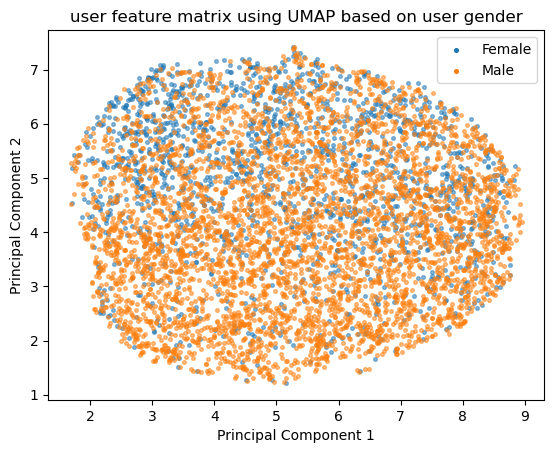

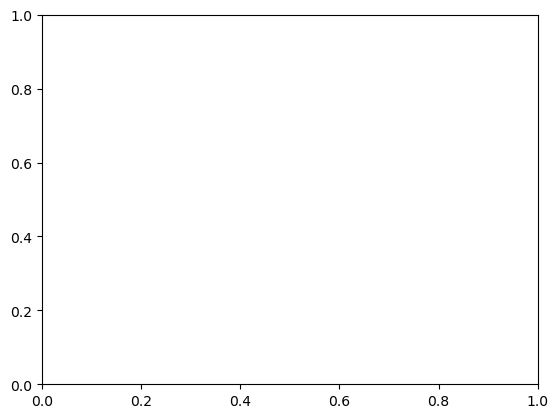

In [190]:
umap_U1 = umap.UMAP(n_components=2)
umap_fit_U1 = umap_M1.fit_transform(U1)

fig, ax = plt.subplots()
label_index = 0
s = 0
for i in np.unique(U1_gender):
    indices = np.where(U1_gender == i)
    ax.scatter(umap_fit_U1[:,0][indices], umap_fit_U1[:,1][indices], s=7,alpha=0.5,label=labels_gender[label_index])
    label_index += 1
    
leg = ax.legend()
for lh in leg.legend_handles: 
    lh.set_alpha(1)
ax.set_title('user feature matrix using UMAP based on user gender')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

#Visualise the clustering based on ages
fig, ax = plt.subplots()
label_index = 0 
for i in np.unique(U1_age):
    indices = np.where(U1_age == i)
    ax.scatter(umap_fit_U1[:,0][indices], umap_fit_U1[:,1][indices], s=7,alpha=0.5,label=labels_age[label_index])
    label_index += 1
leg = ax.legend()
for lh in leg.legend_handles: 
    lh.set_alpha(1)
ax.set_title('user feature matrix using UMAP based on user age')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

3438


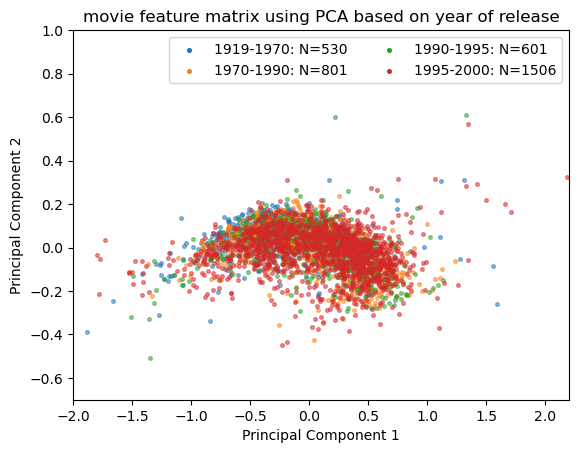

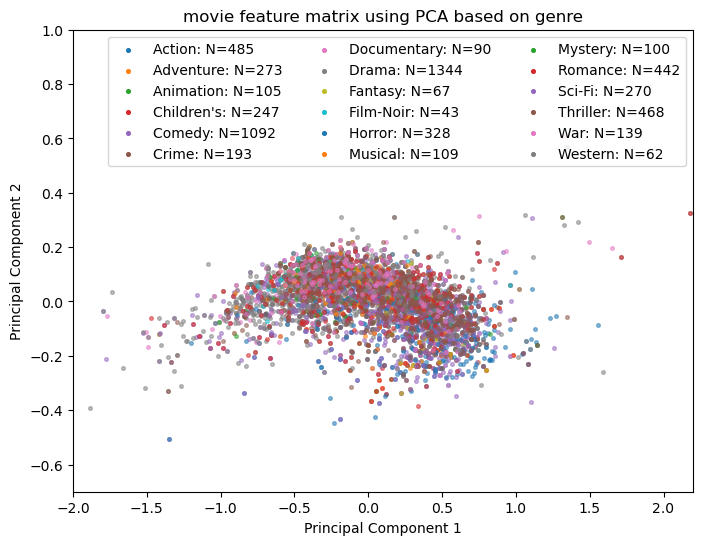

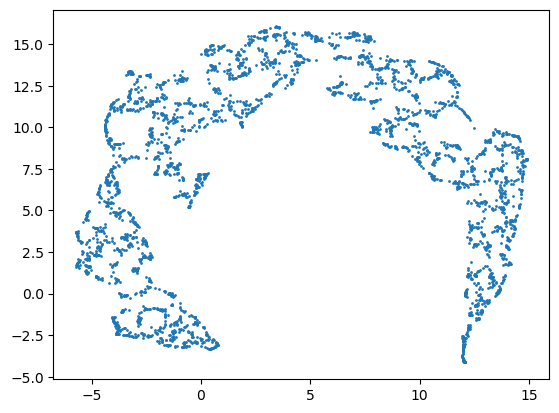

In [185]:
#Obtain the movie attributes
movies1_df = moviesData[moviesData['MovieID'].isin(movies1)]
print(len(movies1_df))

#Define the years the movies were released and corresponding labels
years = movies1_df['Title'].str.extract('\((\d{4})\)',expand=False).astype(int)
labels_year = ['1919-1970','1970-1990','1990-1995','1995-2000']
ranges_year = [1919,1970,1990,1995,2000]

#Define the genres of the movies and corresponding labels
movies1_genre = movies1_df['Genres']
labels_genre = ['Action','Adventure','Animation',"Children's",'Comedy','Crime','Documentary','Drama',\
               'Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']

#Apply the PCA on the U-matrix, reducing the number of user-features and thus the amount of columns to 2
pca = PCA(n_components=2)
pca_data = pca.fit_transform(np.transpose(V1))

#Visualise the clustering based on year of release 
fig, ax = plt.subplots()
for i in range(len(labels_year)):
    #Obtain the indices corresponding to various release year ranges
    if i != len(label)-1:
        indices = np.where( (ranges_year[i+1] > years) & (years >= ranges_year[i]) ) #get all indices between 2 years
    else:
        indices = np.where( (years >= ranges_year[i]) ) #get all indices of the most recently released movies
        
    num_movies = len(indices[0]) #obtain the number of movies 
    labels_year[i] = str(labels_year[i])+': N='+str(num_movies) #add number of movies to the labels
    ax.scatter(pca_data[:,0][indices], pca_data[:,1][indices], s=7,alpha=0.5,label=labels_year[i])
    
leg = ax.legend(ncol=2)
for lh in leg.legend_handles: 
    lh.set_alpha(1)
ax.set_title('movie feature matrix using PCA based on year of release')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_xlim([-2,2.2])
ax.set_ylim([-0.7,1])
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
for i in range(len(labels_genre)):
    #Obtain the indices corresponding to various movie ranges
    genre_indices = np.char.find(list(movies1_genre),labels_genre[i])
    indices = np.where(genre_indices != -1)
        
    num_movies = len(indices[0]) #obtain the number of movies 
    labels_genre[i] = str(labels_genre[i])+': N='+str(num_movies) #add number of movies to the labels
    ax.scatter(pca_data[:,0][indices], pca_data[:,1][indices], s=7,alpha=0.5,label=labels_genre[i])
    
leg = ax.legend(ncol=3)
for lh in leg.legend_handles: 
    lh.set_alpha(1)
ax.set_title('movie feature matrix using PCA based on genre')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_xlim([-2,2.2])
ax.set_ylim([-0.7,1])
plt.show()

umap_M1 = umap.UMAP(n_components=2)
umap_fit_M1 = umap_M1.fit_transform(np.transpose(V1))

plt.scatter(umap_fit_M1[:,0],umap_fit_M1[:,1],s=1)
plt.show()

In [ ]:
M1_tsne = TSNE(n_components=2)
M1_tsne_30 = M1_tsne.fit_transform(U1)

plt.scatter(M1_tsne_30[:,0],M1_tsne_30[:,1],s=3,alpha=0.7,c=user_gender)
plt.title('U matrix using t-SNE based on gender')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

fig, ax = plt.subplots()
for g in np.unique(user_age):
    i = np.where(U1_age == g)
    ax.scatter(M1_tsne_30[:, 0][i], M1_tsne_30[:, 1][i], s=7,alpha=0.7,label=g)
ax.legend()
ax.set_title('U matrix using t-SNE based on gender')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.show()

MovieID  1     2     3     4     5     6     7     8     9     10    ...  \
UserID                                                               ...   
1         5.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
5         0.0   0.0   0.0   0.0   0.0   2.0   0.0   0.0   0.0   0.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
6036      0.0   0.0   0.0   2.0   0.0   3.0   0.0   0.0   0.0   0.0  ...   
6037      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
6038      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
6039      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
6040      3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

MovieID  39

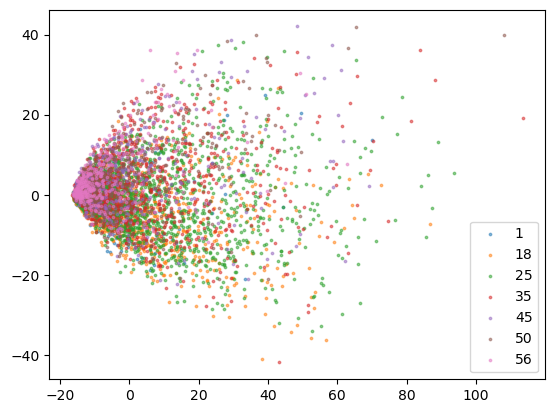

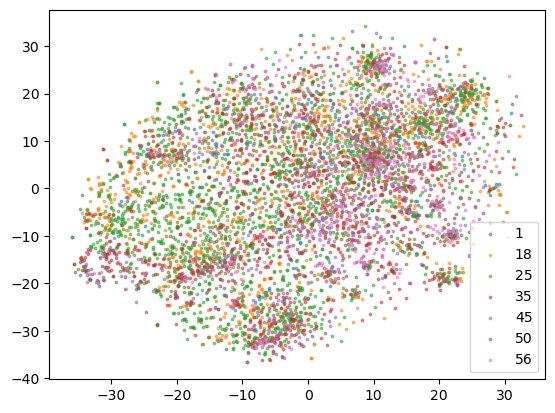

In [21]:
user_movies = ratingsData.pivot(index = "UserID", columns ="MovieID", values = "Rating")
user_movies = user_movies.fillna(0)
print(user_movies)

user_gender = usersData['Gender']
user_age = usersData['Age']

#label male user with 0, female with 1 
user_gender = [0 if x == 'M' else 1 for x in user_gender]

#########################################
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Apply PCA for dimensionality reduction
#scaler = StandardScaler()
#scaled_matrix = scaler.fit_transform(user_movies)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(user_movies)

fig, ax = plt.subplots()
for g in np.unique(user_age):
    i = np.where(user_age == g)
    ax.scatter(pca_result[:, 0][i], pca_result[:, 1][i], s=3,alpha=0.5,label=g)
ax.legend()
plt.show()

    
# Visualize the 2D representation using a scatter plot
#plt.figure(figsize=(8, 6))
#plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5,c=user_age)
#plt.title('2D Visualization of the User-Movie Matrix using PCA')
#plt.xlabel('Principal Component 1')
#plt.ylabel('Principal Component 2')
#plt.show()
#########################################

M1_tsne = TSNE(n_components=2)
M1_tsne_30 = M1_tsne.fit_transform(user_movies)

fig, ax = plt.subplots()
for g in np.unique(user_age):
    i = np.where(user_age == g)
    ax.scatter(M1_tsne_30[:, 0][i], M1_tsne_30[:, 1][i], s=3,alpha=0.5,label=g)
ax.legend()
plt.show()

userData is 
       UserID Gender  Age  Occupation Zip-code
0          1      F    1          10    48067
1          2      M   56          16    70072
2          3      M   25          15    55117
3          4      M   45           7    02460
4          5      M   25          20    55455
...      ...    ...  ...         ...      ...
6035    6036      F   25          15    32603
6036    6037      F   45           1    76006
6037    6038      F   56           1    14706
6038    6039      F   45           0    01060
6039    6040      M   25           6    11106

[6040 rows x 5 columns]
(6040, 2)
0
1


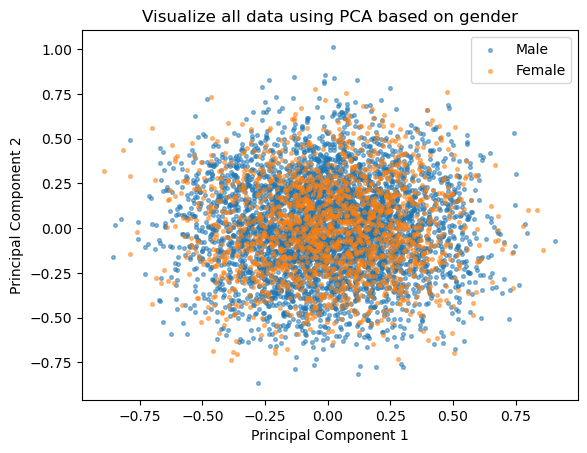

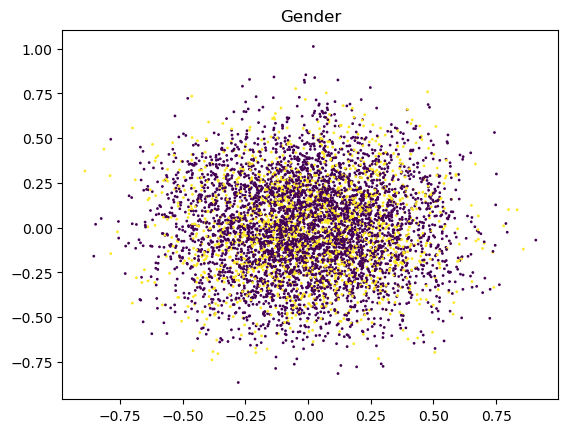

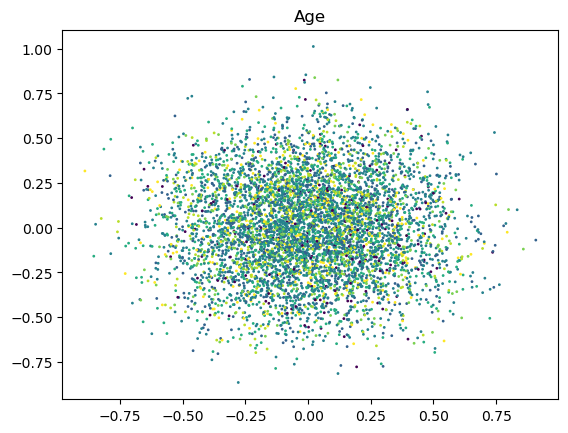

In [56]:
print('userData is \n',usersData)
movie_IDs = ratingsData['MovieID']
user_IDs = ratingsData['UserID']

user_gender = usersData['Gender']
user_age = usersData['Age']

#label male user with 0, female with 1 
user_gender = [0 if x == 'M' else 1 for x in user_gender]

pca = PCA(n_components=2)
pca.fit(U_1)
pca_data = pca.transform(U_1)
print(pca_data.shape)

fig, ax = plt.subplots()
for g in np.unique(user_gender):
    print(g)
    i = np.where(user_gender == g)
    labels = ['Male','Female']
    ax.scatter(pca_data[:,0][i], pca_data[:,1][i], s=7,alpha=0.5,label=labels[g])
ax.legend()
ax.set_title('Visualize all data using PCA based on gender')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.show()

plt.scatter(pca_data[:,0],pca_data[:,1],s=1,c=user_gender)
plt.title('Gender')
plt.show()

plt.scatter(pca_data[:,0],pca_data[:,1],s=1,c=user_age)
plt.title('Age') 
plt.show()

(3676, 10)
(3683, 10)
(6040, 10)
(6040, 10)
(3683, 2)


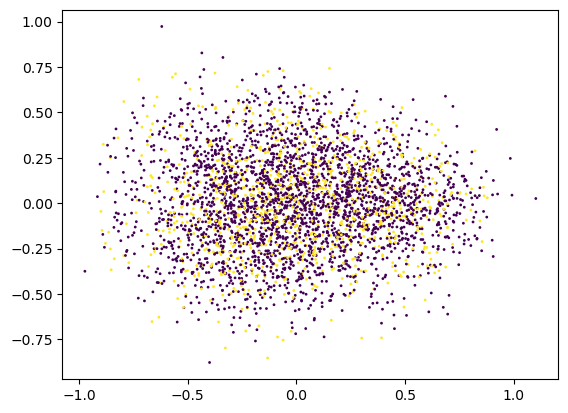

In [177]:
#First, we try reducing the dimensionality with PCA

import random
my_list = [0]*1800 + [1]*1883

random.shuffle(my_list)

print(M_2.shape)
print(M_1.shape)
print(U_1.shape)
print(U_6.shape)

pca = PCA(n_components=2)
pca.fit(M_1)
pca_data = pca.transform(M_1)
print(pca_data.shape)

plt.scatter(pca_data[:,0],pca_data[:,1],s=1,c=user_gender[0:3683])
plt.show()

TSNE(learning_rate=0.005, perplexity=30, random_state=42)


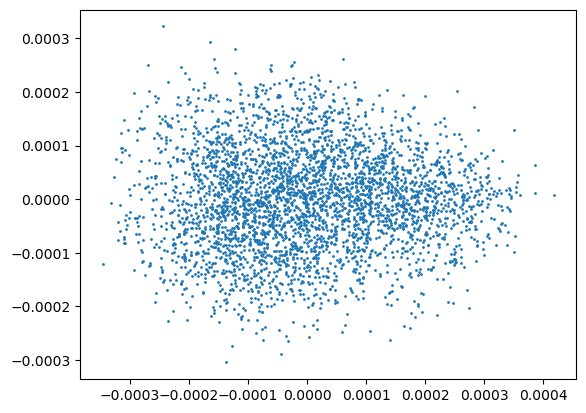

In [203]:
#T-SNE

M1_tsne = TSNE(n_components=2,learning_rate=0.005,perplexity=30,random_state=42)
print(M1_tsne)
M1_tsne_30 = M1_tsne.fit_transform(M_1)

plt.scatter(M1_tsne_30[:,0],M1_tsne_30[:,1],s=1)
plt.show()

C:\Users\jimje\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


[[12.465181    0.65691394]
 [10.7439785   4.074591  ]
 [ 8.374511    1.4283706 ]
 ...
 [ 6.5196548   1.2718139 ]
 [10.725165    3.0773904 ]
 [10.678437    1.1509147 ]]


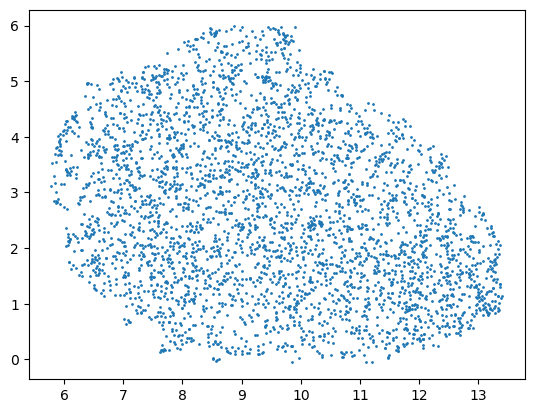

In [60]:
#UMAP

umap_M1 = umap.UMAP(n_components=2,init='random',random_state=42)
umap_fit_M1 = umap_M1.fit_transform(M_1)

print(umap_fit_M1)

plt.scatter(umap_fit_M1[:,0],umap_fit_M1[:,1],s=1)
plt.show()